#### To refresh -   Click   Cell >  Run All

In [55]:
import T03
import time
import math

current_day = 240

df , today_day = T03.get_data(current_day)
next4days = T03.make_future_predictions(today_day)
cash_df = T03.get_cash_data(today_day)
stinfo ,working_df = T03.get_stations_info(today_day)

pending_jobs = max(0,working_df['JOBIN'].sum()  -  working_df['JOBOUT'].sum())
pending_jobs_f = pending_jobs > 7

job_rev = working_df.iloc[-1]['JOBREV']
job_rev_f = job_rev < 1100

job_time = working_df.iloc[-1]['JOBT'].mean()
job_time_f = job_time > .5

R ,S , H=  df.iloc[today_day-1]['JOBIN_PRED'],800, 600*.1/365
lead_time , demand_std = 5 , df.iloc[today_day-50:today_day]['JOBIN'].std()
eoq , rop = math.ceil(math.sqrt(  2 *  R * S / H)) , math.ceil (lead_time * R + demand_std*3 )

days_remaining = 268 - today_day
inventory_needed = df.iloc[150:today_day]['JOBIN'].mean() * days_remaining
inventory_std = df.iloc[150:today_day]['JOBIN'].std() / math.sqrt(days_remaining)
print(inventory_std)
inventory_needed_u = 12.75 * days_remaining


current_inv = df.iloc[today_day-1]['INV']/60
print("Next Order Size :",inventory_needed_u -current_inv,inventory_needed -current_inv)

ImportError: No module named 'T031'

# Today is  Day {{today_day}}


| Check   |      Value      | Warning Flag |
|----------|-------------:|------:|
| Pending Jobs |  {{pending_jobs}} | {{pending_jobs_f}} |
| Job Revenue |    $ {{job_rev}}   |   {{job_rev_f}} |
| Job Lead Time |    {{job_time}} day  |   {{job_time_f}} |

Suggested : EOQ **{{eoq}}** , ROP **{{100}}**

**pending** Jobs are a spillover from yesterday. A number close to 0.3 times **Station Capacity** is deemed unhealthy 


In [43]:
T03.print_summary()

##### Time : Sat Feb 27 18:05:23 2016 : Today is DAY : 217
Current Health : FLYING
# 98% pecentile order range [12.490397021514942, 2, 12.746268656716419, 23]  std : 3.9093643735929584
------------------------------------------------------------
     day  JOBIN  JOBQ  JOBOUT  JOBREV   JOBT  INV      CASH
212  213     18     0      16    1250  0.426  101  1777.834
213  214     10     0      11    1250  0.424   91  1792.051
214  215     13     0      12    1250  0.419   78  1447.281
215  216     11     0      11    1250  0.436   67  1461.411
216  217     16     0      18    1250  0.434   51  1484.295
------------------------------------------------------------
##### Stations
------------------------------------------------------------
  sname  mc  station_capacity  average_util  pending  expected_q  actual_q warning
0    S1   2         31.893004         0.530        0           0     9.272   False
1    S2   5         24.763900         0.695        0           0     6.255   False
2    S3 

     day         CASH         INV
215  216  1461.411000   67.000000
216  217  1150.009110  637.010248
217  218  1165.932022  624.519851
218  219  1181.859296  612.029454


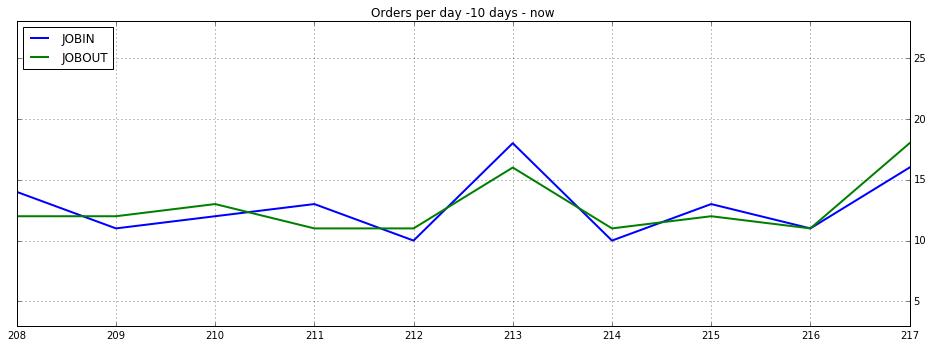

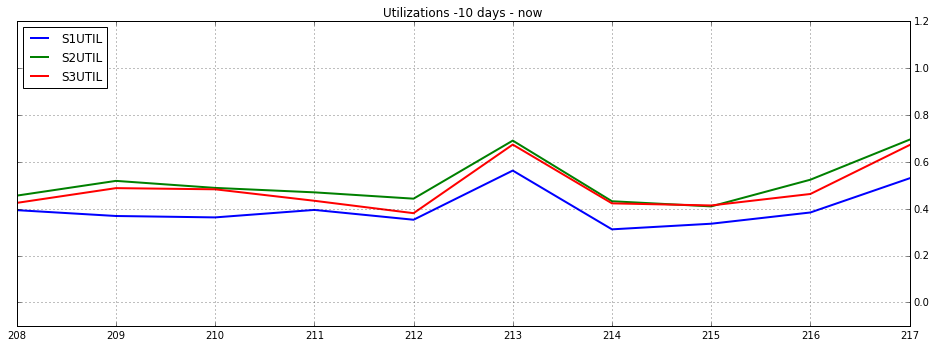

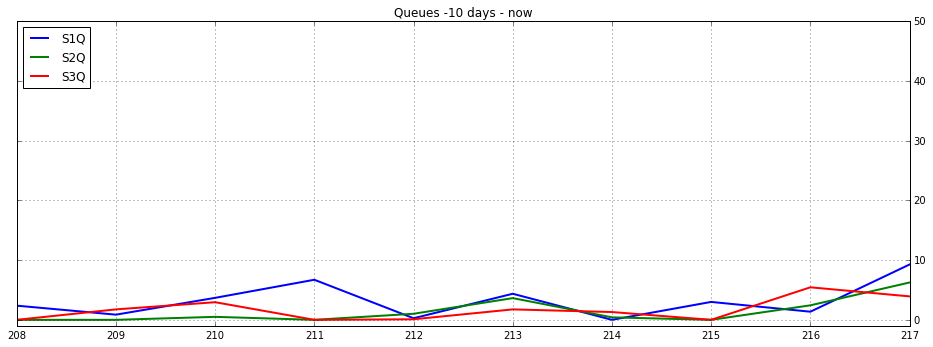

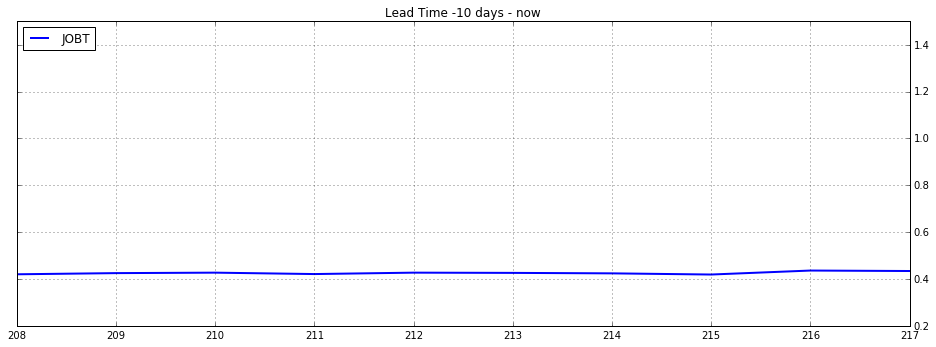

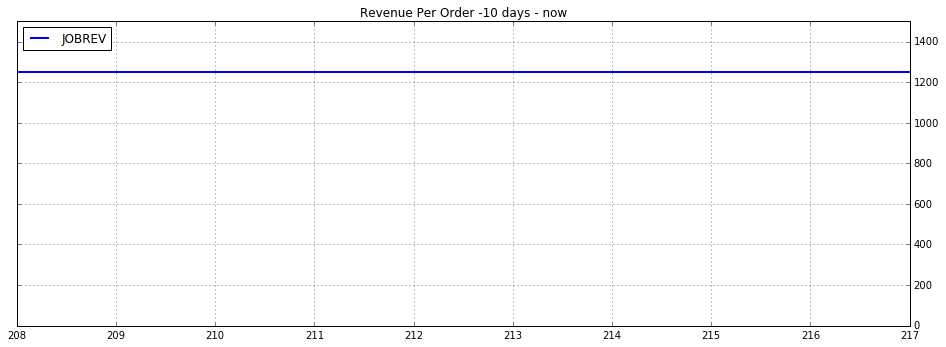

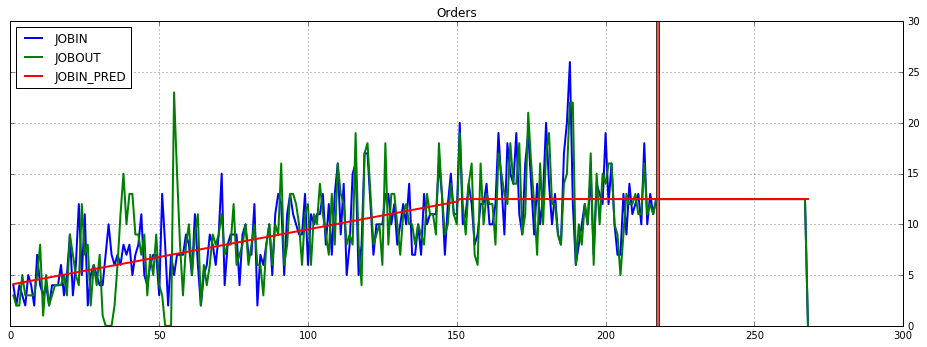

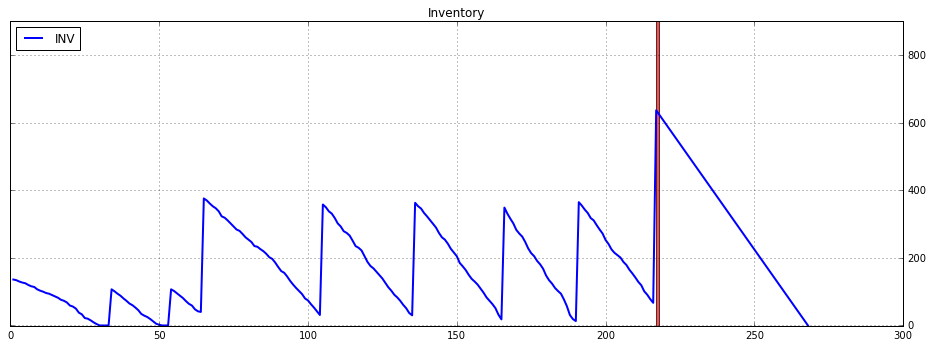

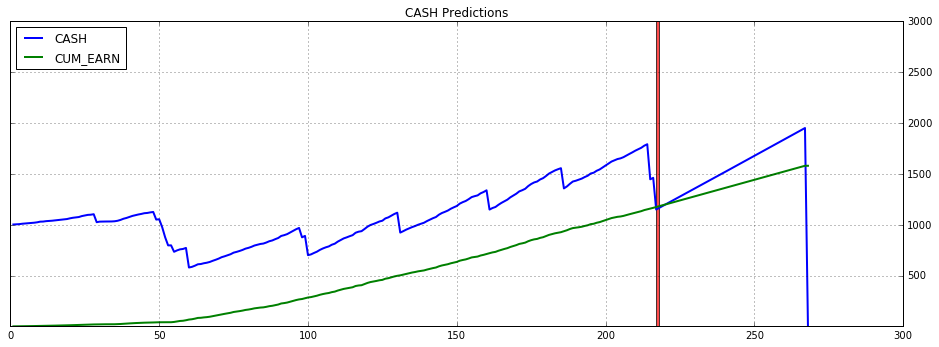

In [44]:
%matplotlib inline
import T03
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np

rcParams['figure.figsize'] = 16, 12
rcParams['lines.linewidth'] = 2

perf_df = df.iloc[today_day-50:today_day].copy()


T03.plotx(plt,1,perf_df,['JOBIN','JOBOUT'],(3,28),"Orders per day -10 days - now")
T03.plotx(plt,2,perf_df,['S1UTIL','S2UTIL','S3UTIL'],(-.1,1.2),"Utilizations -10 days - now")
T03.plotx(plt,3,perf_df,['S1Q','S2Q','S3Q'],(-1,50),"Queues -10 days - now")

T03.plotx(plt,4,perf_df,['JOBT',],(.2,1.5),"Lead Time -10 days - now")
T03.plotx(plt,5,perf_df,['JOBREV'],(-1,1500),"Revenue Per Order -10 days - now")

T03.plotx(plt,6,cash_df,['JOBIN','JOBOUT','JOBIN_PRED'],(0,30),"Orders",today_day)


# print (invdf['INV'])
T03.plotx(plt,7,cash_df,['INV'],(-1,900),"Inventory",today_day)

T03.plotx(plt,8,cash_df,['CASH','CUM_EARN'],(6,3000),"CASH Predictions",today_day)
# T03.plotx(plt,8,cash_df,['CASH','CUM_EARN','CASH_1K',"CASH_750"],(6,3000),"CASH Predictions",today_day)

print (cash_df.iloc[today_day-2:today_day+2][['day','CASH','INV']])

# Autopilot Action Log

In [45]:
with open("/home/ajar/work/little/R01.log",'rb') as f:
    for line in f:
        print(line)

b'<2016-02-26 01:01:11,537> <Perf Check> <WARNING> <Changing Contract from 3 To 2>\n'
b'<2016-02-26 01:01:12,700> <Perf Check> <WARNING> <switch_Contract: Order confirmed>\n'
b"<2016-02-26 01:01:13,037> <Perf Check> <WARNING> <Day - 177.0: Switched contract Level to: 2 ,reason: 'Job Time    : 0.418\\n Too Many Pending jobs - temp downgrade time 0.2916666666666667 day\\n Warning Flags at Stations'>\n"
b'<2016-02-26 01:18:45,080> <Perf Check> <WARNING> <Changing Contract from 2 To 3>\n'
b'<2016-02-26 01:18:46,875> <Perf Check> <WARNING> <switch_Contract: Order confirmed>\n'
b'<2016-02-26 01:18:47,383> <Perf Check> <WARNING> <Day - 177.0: Reverted Contract Level to 3 in 0.2916666666666667 day>\n'
b'<2016-02-26 04:01:11,845> <Perf Check> <WARNING> <Changing Contract from 3 To 2>\n'
b'<2016-02-26 04:01:13,000> <Perf Check> <WARNING> <switch_Contract: Order confirmed>\n'
b"<2016-02-26 04:01:13,332> <Perf Check> <WARNING> <Day - 180.0: Switched contract Level to: 2 ,reason: 'Job Time    : 0.4

### Group Standings

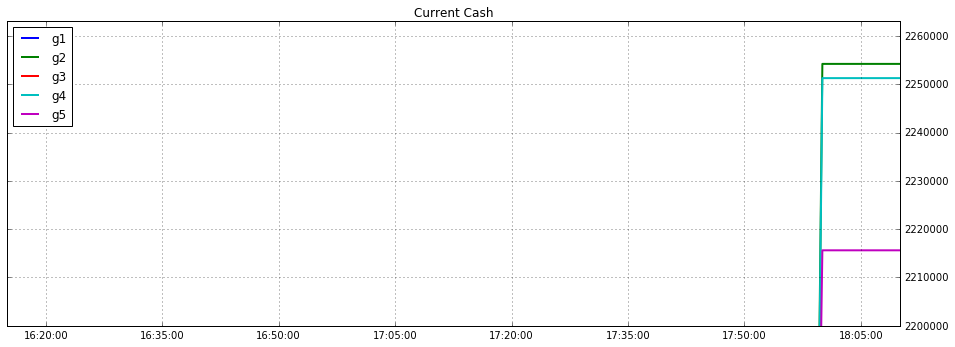

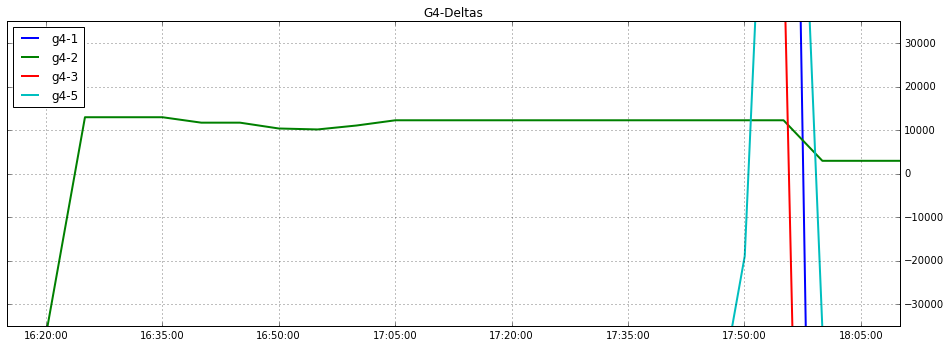

In [54]:
import pandas as pd        
import time


group_df = T03.get_current_assets()

group_df = group_df.tail(2*12)

group_df['g4-g2'] =  group_df['g4'] - group_df['g2']
# T03.plottime(plt,11,group_df,['g4-g2'],(0,50000),"G4-G2")
for i in [1,2,3,5]: group_df['g4-%d'%i] =   group_df['g%d'%i] - group_df['g4'] 
T03.plottime(plt,14,group_df,['g4-1','g4-2','g4-3','g4-5'],(-35000,35000),"G4-Deltas")


# T03.plottime(plt,10,group_df,['g%dass'%i for i in range(1,6)],(1.6e6,1.95e6),"Current Assets")
T03.plottime(plt,13,group_df,['g%d'%i for i in range(1,6)],(2.2e6,2.263e6),"Current Cash")
# T03.plottime(plt,12,group_df,['g%dinv'%i for i in range(1,6)],(600,800),"Inventory")
# T03.plottime(plt,14,group_df,['g%ddelta'%i for i in range(1,6)],(1,5000),"Deltas")
# T03.plottime(plt,15,group_df,['g4ass'],(1.8e6,1.96e6),"Our Assets")


# print(group_df.tail()[['time','day']+['g%ddelta'%i for i in range(1,6)]])
# print(group_df.tail()[['time','day']+['g%d'%i for i in range(1,6)]])
# print(group_df.tail()[['time','day']+['g%dass'%i for i in range(1,6)]])
# print(group_df.tail()[['time','day']+['g%dinv'%i for i in range(1,6)]])
# print(group_df.tail()[['time','day']+['g4-1','g4-2','g4-3','g4-5']])
# xdf = df.iloc[today_day-20:today_day].copy()
# xdf['JOBIN'] = xdf['JOBIN'].cumsum() 
# print(xdf[['day','JOBIN']])

### Past 10 day order mixes

In [47]:
print(df.iloc[today_day-10:today_day][['day','JOBIN','JOBOUT_075', 'JOBOUT_100', 'JOBOUT_125', 'JOBT_100', 'JOBT_125']])

# df.iloc[150:190][['JOBIN']].plot(kind='hist', alpha=0.5)

     day  JOBIN  JOBOUT_075  JOBOUT_100  JOBOUT_125  JOBT_100  JOBT_125
207  208     14           0           0          12         0     0.420
208  209     11           0           0          12         0     0.425
209  210     12           0           0          13         0     0.427
210  211     13           0           0          11         0     0.421
211  212     10           0           0          11         0     0.427
212  213     18           0           0          16         0     0.426
213  214     10           0           0          11         0     0.424
214  215     13           0           0          12         0     0.419
215  216     11           0           0          11         0     0.436
216  217     16           0           0          18         0     0.434
